# Customer Segmentation

In this notebook, customer segmentation of a mall is demonstrated. KMeans Clustering has been used. 

In [1]:
# importing necessary packaged

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# importing dataset into dataframe

customer_data = pd.read_csv("F:\Personal Interest\Data Repository\customer-segmentation-dataset\customer-segmentation-dataset\Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# investigating data types of the columns

customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
#summary statistics

customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Count')

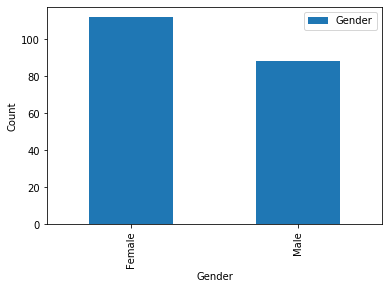

In [5]:
# Count of Genders

genv = pd.DataFrame(customer_data["Gender"].value_counts())
viz = genv.plot.bar()
viz.set_xlabel("Gender")
viz.set_ylabel("Count")

In [6]:
genv.index[0]

'Female'

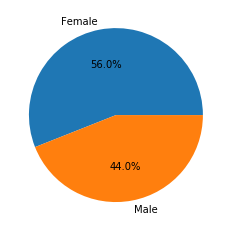

In [7]:
viz_pie = plt.pie(genv["Gender"], labels = genv.index, autopct='%1.1f%%')

So, 56% of the customers are female and rest are male

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

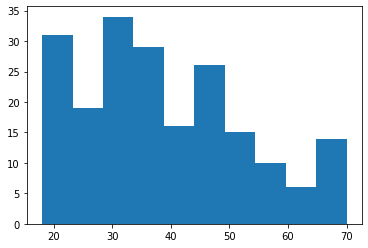

In [8]:
#Age Distribution

plt.hist(customer_data["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x261555af4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x261555afba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x261555af0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x261555affd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261555b95c0>],
 'means': []}

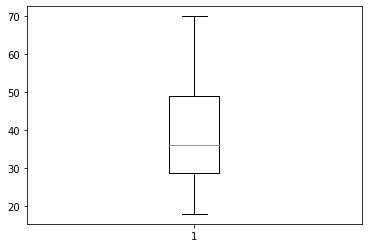

In [9]:
plt.boxplot(customer_data["Age"])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

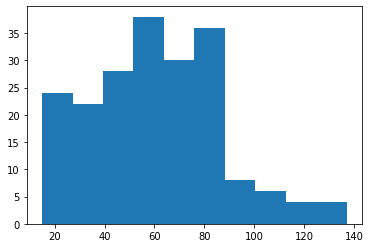

In [10]:
#Annual Income distribution

plt.hist(customer_data["Annual Income (k$)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26155688b00>,
 'caps': [<matplotlib.lines.Line2D at 0x26155688f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x261556886d8>],
 'medians': [<matplotlib.lines.Line2D at 0x26155696860>],
 'fliers': [<matplotlib.lines.Line2D at 0x26155696ba8>],
 'means': []}

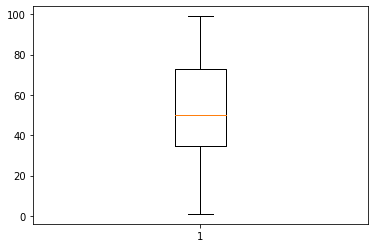

In [11]:
plt.boxplot(customer_data["Spending Score (1-100)"])

Now let's start clustering. We'll import KMeans package from sci-kit learn package and use it for clustering.

In [12]:
from sklearn.cluster import KMeans

In [28]:
# Converting categorical to numerical values.

customer_data['Gender'] = customer_data_copy['Gender'].astype('category').cat.codes
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Taking features into an array

X = customer_data.values[:,1:]

In [31]:
X = np.nan_to_num(X)

In [37]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [32]:
# Standardization od data

clust = StandardScaler().fit_transform(X)

In [40]:
# clustering process

cluster_num = 5
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [41]:
# inserting cluster number for all customers

customer_data["Cluster"] = labels
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


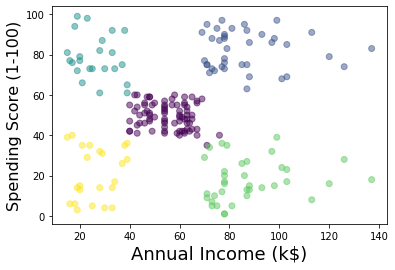

In [42]:
# plotting customer segments with Annual Income and Spending Score

plt.scatter(X[:, 2], X[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

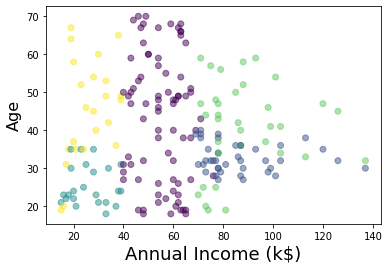

In [43]:
# plotting customer segments with Annual Income and age

plt.scatter(X[:, 2], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Age', fontsize=16)

plt.show()

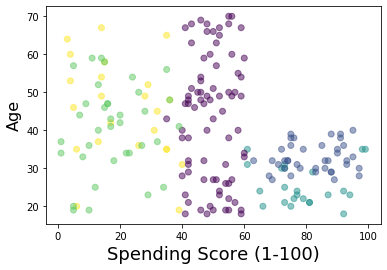

In [44]:
# plotting customer segments with Age and Spending Score

plt.scatter(X[:, 3], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Spending Score (1-100)', fontsize=18)
plt.ylabel('Age', fontsize=16)

plt.show()